D:\anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


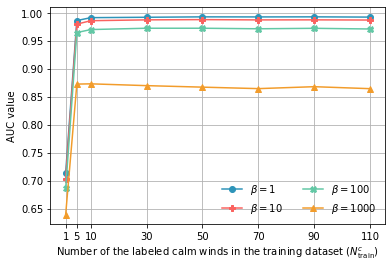

In [3]:
import  tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import os
os.environ["OMP_NUM_THREADS"] = '4'
import scipy.io as scio
import numpy as np
import random
import sklearn.svm as svm
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.svm import SVC
from tools import *
from sklearn.manifold import TSNE
from Data_import import data_frame
from model_evaluation import *
from ClusterNN import cluster_NN,svm_classifier
all_colors = ['#2E94B9', "#fa625f", '#62C8A5', '#f29c2b']
calm_range_set = 5
calm_nums = [1,5,10,30,50,70,90,110]#,130,150
AUCs = np.zeros((len(calm_nums),4))
for count,calm_train_num in enumerate(np.array(calm_nums)):
    metric_values_iterations_dims = scio.loadmat(f'./results_save/metric_values_CalmRange{calm_range_set}_CalmTrainNum{calm_train_num}_2000.mat')
    metric_values = metric_values_iterations_dims['metric_values']
    ACC_TRAIN = metric_values['ACC_TRAIN'][0,0]
    PTA = metric_values['PTA'][0,0]
    ACC_TEST = metric_values['ACC_TEST'][0,0]
    AUC = metric_values['AUC'][0,0]
    CSI = metric_values['CSI'][0,0]
#     selected_index = np.argmax(np.sum(AUC,axis = 1))
    selected_index = 2000
    AUCs[count,::] = AUC[selected_index,::]

plt.plot(calm_nums, AUCs[::,0],'o-', color = all_colors[0], label = r'$\beta=1$')
plt.plot(calm_nums, AUCs[::,1],'P-', color = all_colors[1], label = r'$\beta=10$')
plt.plot(calm_nums, AUCs[::,2],'X-', color = all_colors[2], label = r'$\beta=100$')
plt.plot(calm_nums, AUCs[::,3],'^-', color = all_colors[3], label = r'$\beta=1000$')
plt.grid()
plt.xticks(calm_nums,calm_nums )
plt.legend(frameon=False, ncol=2)
plt.xlabel(r'Number of the labeled calm winds in the training dataset ($N_{\rm train}^c$)')
plt.ylabel('AUC value')
plt.savefig(f'../figures/auc_with_calm_num.png',dpi=600)
plt.savefig(f'../figures/auc_with_calm_num.pdf')

In [189]:
metric_values_iterations_dims = scio.loadmat(f'./results_save/metric_values_CalmRange5_CalmTrainNum10_3000.mat')#metric_values_pilot_calm_center.mat
metric_values = metric_values_iterations_dims['metric_values']
AUC = metric_values['AUC'][0,0]
ACC_TRAIN = metric_values['ACC_TRAIN'][0,0]
PTA = metric_values['PTA'][0,0]
ACC_TEST = metric_values['ACC_TEST'][0,0]

Text(0, 0.5, 'AUC value')

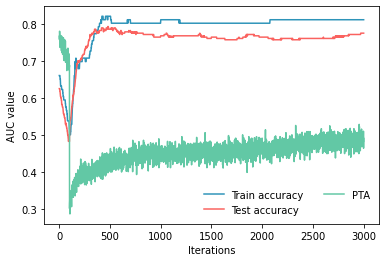

In [191]:
%matplotlib inline
index = 1
plt.plot( ACC_TRAIN[::index],'-', color = all_colors[0], label = r'Train accuracy')
plt.plot( ACC_TEST[::index],'-', color = all_colors[1], label = r'Test accuracy')
plt.plot( PTA[::index],'-', color = all_colors[2], label = r'PTA')
# plt.grid()
plt.legend(frameon=False, ncol=2)
plt.xlabel('Iterations')
plt.ylabel('AUC value')
# plt.show(block=True)

# plt.savefig(f'../figures/acc_pta_with_iterations_overfitting.png',dpi=600)
# plt.savefig(f'../figures/acc_pta_with_iterations_overfitting.pdf')

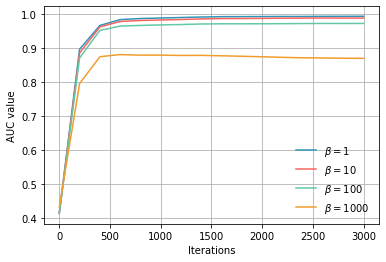

In [180]:
%matplotlib inline
plt.plot(range(0,3001,200), AUC[::,0][::200],'-', color = all_colors[0], label = r'$\beta=1$')
plt.plot(range(0,3001,200), AUC[::,1][::200],'-', color = all_colors[1], label = r'$\beta=10$')
plt.plot(range(0,3001,200), AUC[::,2][::200],'-', color = all_colors[2], label = r'$\beta=100$')
plt.plot(range(0,3001,200), AUC[::,3][::200],'-', color = all_colors[3], label = r'$\beta=1000$')
plt.legend(frameon=False)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('AUC value')
plt.savefig(f'../figures/auc_with_iterations_overfitting.png',dpi=600)
plt.savefig(f'../figures/auc_with_iterations_overfitting.pdf')